<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />


## GBI6-2021II: BIOINFORMÁTICA

**Yumbo, Jimmy** 

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font> #YA :(


### REQUERIMIENTOS PARA LA TAREA
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [4]:
def download_pubmed (keyword):
    """
  Muestras de IDs de la busqueda en pubmed
    """
    from Bio import Entrez
    from Bio import SeqIO
    from Bio import GenBank 
    Entrez.email = 'jimmy.yumbo@est.ikiam.edu.ec'
    handle = Entrez.esearch(db='pubmed',
                        sort='relevance',
                        retmax='200',
                        retmode='xml',
                        term=keyword)
    results = Entrez.read(handle)
    id_list = results["IdList"]
    ids = ','.join(id_list)
    Entrez.email = 'jimmy.yumbo@est.ikiam.edu.ec'
    handle = Entrez.efetch(db='pubmed',
                       retmode='xml',
                       id=ids)
    lista_id = ids.split(",")
    return (lista_id) 


import csv 
import re
import pandas as pd 
from collections import Counter

def mining_pubs(tipo):
    """
   Entrada tres variables: "DP", "AU" y "AD" dando como resultado una dataframe
    """
    with open("pubmed-EcuadorGen-set.txt", errors="ignore") as f: 
        texto = f.read() 
    if tipo == "DP":
        PMID = re.findall("PMID- (\d*)", texto) 
        year = re.findall("DP\s{2}-\s(\d{4})", texto)
        pmid_y = pd.DataFrame()
        pmid_y["PMID"] = PMID
        pmid_y["Año de publicación"] = year
        return (pmid_y)
    elif tipo == "AU": 
        PMID = re.findall("PMID- (\d*)", texto) 
        autores = texto.split("PMID- ")
        autores.pop(0)
        num_autores = []
        for i in range(len(autores)):
            numero = re.findall("AU -", autores[i])
            n = (len(numero))
            num_autores.append(n)
        pmid_a = pd.DataFrame()
        pmid_a["PMID"] = PMID 
        pmid_a["Numero de autores"] = num_autores
        return (pmid_a)
    elif tipo == "AD": 
        texto = re.sub(r" [A-Z]{1}\.","", texto)
        texto = re.sub(r"Av\.","", texto)
        texto = re.sub(r"Vic\.","", texto)
        texto = re.sub(r"Tas\.","", texto)
        AD = texto.split("AD  - ")
        n_paises = []
        for i in range(len(AD)): 
            pais = re.findall("\S, ([A-Za-z]*)\.", AD[i])
            if not pais == []: 
                if not len(pais) >= 2:  
                    if re.findall("^[A-Z]", pais[0]): 
                        n_paises.append(pais[0])
        conteo=Counter(n_paises)
        resultado = {}
        for clave in conteo:
            valor = conteo[clave]
            if valor != 1: 
                resultado[clave] = valor 
        veces_pais = pd.DataFrame()
        veces_pais["pais"] = resultado.keys()
        veces_pais["numero de autores"] = resultado.values()
        return (veces_pais)

import miningscience as msc 
help(download_pubmed)
help(mining_pubs)


Help on function download_pubmed in module __main__:

download_pubmed(keyword)
    Muestras de IDs de la busqueda en pubmed

Help on function mining_pubs in module __main__:

mining_pubs(tipo)
    Entrada tres variables: "DP", "AU" y "AD" dando como resultado una dataframe




## Ejercicio 2 [1 punto]

In [5]:
journals = download_pubmed("Ecuador Genomics")

print ("El numero de articulos es:", len(journals)) 

print ("El PMID del primer articulo es:", journals[0])


El numero de articulos es: 193
El PMID del primer articulo es: 31822297


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [6]:
import miningscience as msc
pub_año = msc.mining_pubs("DP")
print (pub_año.iloc[0:2])
print (pub_año.iloc[712:])
pub_autor = msc.mining_pubs("AU")
print (pub_autor.iloc[0:2])
print (pub_autor.iloc[712:])
countries = msc.mining_pubs("AD")
print (countries.iloc[0:2])
print (countries.iloc[116:])

       PMID Año de publicación
0  19844075               2010
1  31822297               2019
         PMID Año de publicación
712  27479083               2016
713  31139509               2019
714  25929854               2015
715  23651240               2013
716  35099556               2022
..        ...                ...
823  32917887               2020
824  33634602               2021
825  28785301               2017
826  27429642               2016
827  31891233               2020

[116 rows x 2 columns]
       PMID  Numero de autores
0  19844075                  2
1  31822297                  3
         PMID  Numero de autores
712  27479083                 11
713  31139509                 12
714  25929854                 10
715  23651240                  2
716  35099556                  7
..        ...                ...
823  32917887                 30
824  33634602                102
825  28785301                173
826  27429642                173
827  31891233                72

## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La media es:  2014.87077294686
La desviación estandar es:  6.804327940706898


Text(0, 0.5, 'Repeticiones')

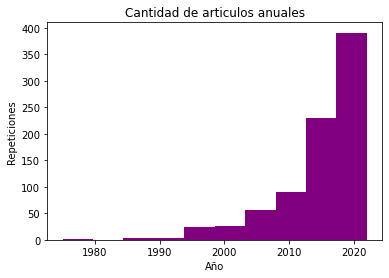

In [7]:
import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter
pub_año["Año de publicación"] = pub_año["Año de publicación"].astype("int")
mean_py = pub_año["Año de publicación"].mean()
sd_py = pub_año["Año de publicación"].std()
print ("La media es: ", mean_py)
print ("La desviación estandar es: ", sd_py)
#print (pub_year["Año de publicación"])
intervalos = range(min(pub_año["Año de publicación"]), max(pub_año["Año de publicación"]))
plot.hist(x=pub_año["Año de publicación"], color = "purple")
plot.title("Cantidad de articulos anuales")
plot.xlabel("Año")
plot.ylabel("Repeticiones")

         PMID  Numero de autores
0    19844075                  2
1    31822297                  3
2    29632024                 33
3    32623267                 15
4    27577878                 93
..        ...                ...
823  32917887                 30
824  33634602                102
825  28785301                173
826  27429642                173
827  31891233                728

[828 rows x 2 columns]


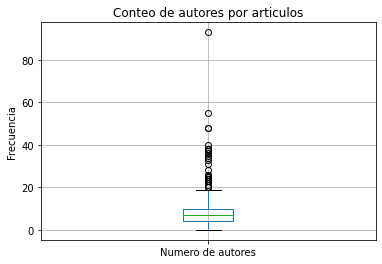

In [8]:
boxplot = pub_autor[0:712].boxplot(column=["Numero de autores"])
plot.title("Conteo de autores por articulos")
plot.ylabel("Frecuencia")
print (pub_autor)

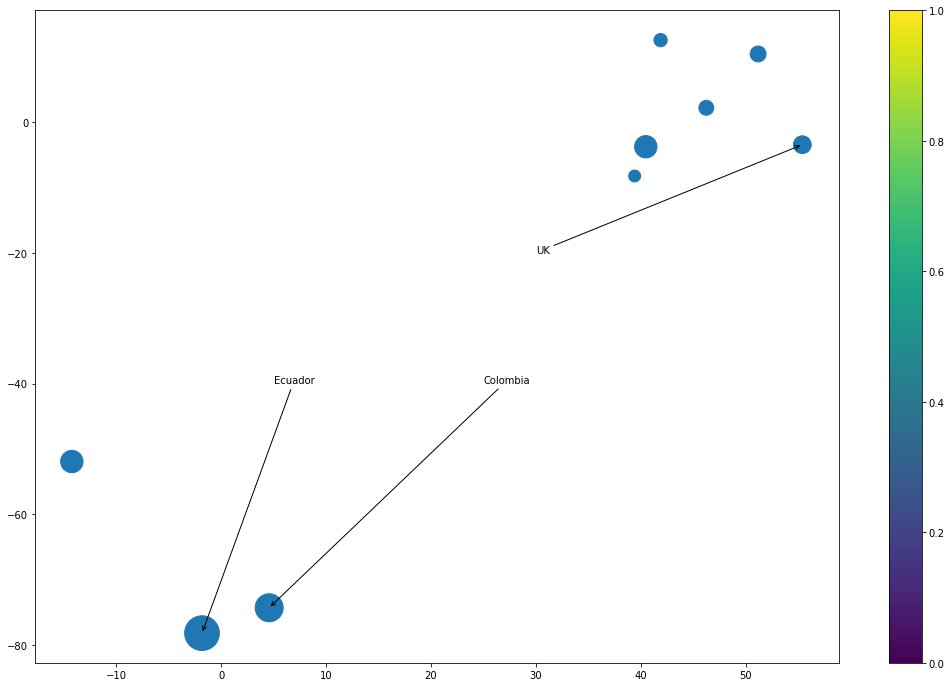

In [9]:
countries = countries.sort_values("numero de autores")
max_pais = (countries[104:])

countries_lat = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 4.570868, -1.831239  ] 
                 
countries_long = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -74.297333, -78.183406]
repeticiones = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]

import matplotlib.pyplot as plot
%matplotlib inline

plot.scatter(countries_lat, countries_long, repeticiones) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("Ecuador", xy = (-1.831239, -78.183406 ), 
             xytext = (5,-40), arrowprops = ard) 
plot.annotate("Colombia", xy= ( 4.570868, -74.297333), 
            xytext = (25, -40), arrowprops = ard)
plot.annotate("UK", xy= (55.378051, -3.435973), 
            xytext = (30, -20), arrowprops = ard)
params = plot.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plot.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**





### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

### En la imagen del arbol filogenetico se puede observar que existen 6 clados y que las secuencias con los MZ736440.1 y MZ736440.1 son las que tienen mayor similitud

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```